In [1]:
#pip install tensorflow 


In [2]:
pip install opencv-python

In [3]:
# pip install numpy 

In [4]:
# pip install matplotlib

In [5]:
import tensorflow as tf 
import os 

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

tf.config.list_physical_devices('GPU')



[]

In [6]:
data_dir = r"C:\Users\amber\OneDrive\Desktop\In_House_final\datasets_training"

import os
parent_dir = os.path.dirname(data_dir)
os.chdir(parent_dir)
data_dir = "datasets_training"

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image datasets_training\testing\healthy
Issue with image datasets_training\testing\parkinson
Issue with image datasets_training\training\healthy
Issue with image datasets_training\training\parkinson


In [26]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout




In [28]:
data = tf.keras.utils.image_dataset_from_directory('datasets_training')


Found 102 files belonging to 2 classes.


In [29]:
data_iterator = data.as_numpy_iterator()

In [30]:
batch = data_iterator.next()

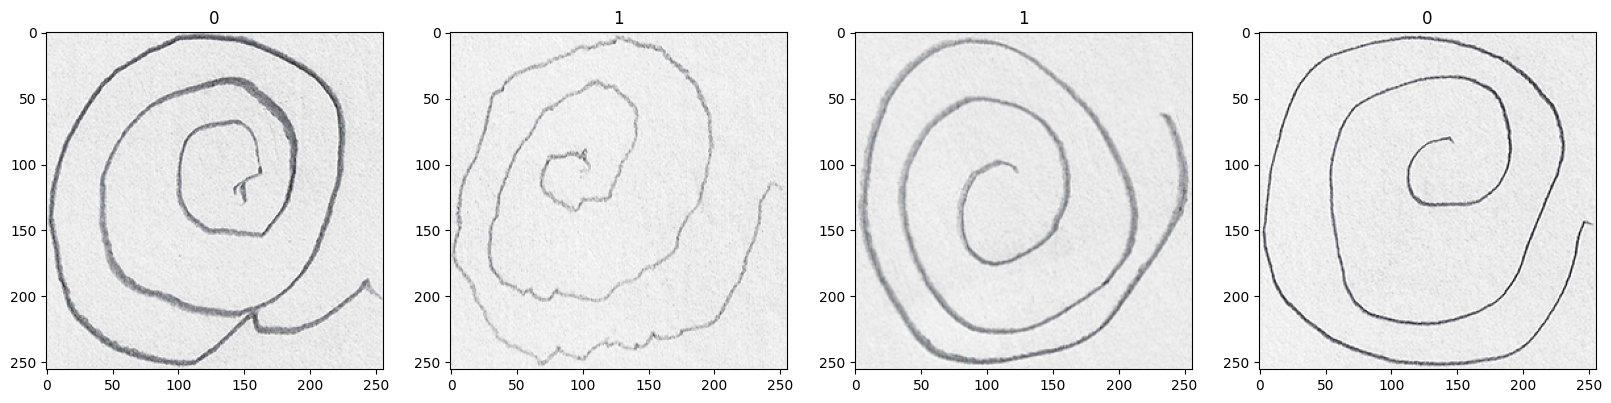

In [31]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [32]:
data = data.map(lambda x,y: (x/255, y))

In [33]:
data.as_numpy_iterator().next()

(array([[[[0.9411765 , 0.9411765 , 0.9411765 ],
          [0.9411765 , 0.9411765 , 0.9411765 ],
          [0.92941177, 0.92941177, 0.92941177],
          ...,
          [0.93333334, 0.93333334, 0.93333334],
          [0.9411765 , 0.9411765 , 0.9411765 ],
          [0.94509804, 0.94509804, 0.94509804]],
 
         [[0.9490196 , 0.9490196 , 0.9490196 ],
          [0.9372549 , 0.9372549 , 0.9372549 ],
          [0.9490196 , 0.9490196 , 0.9490196 ],
          ...,
          [0.9019608 , 0.9019608 , 0.9019608 ],
          [0.8980392 , 0.8980392 , 0.8980392 ],
          [0.90588236, 0.90588236, 0.90588236]],
 
         [[0.9529412 , 0.9529412 , 0.9529412 ],
          [0.9490196 , 0.9490196 , 0.9490196 ],
          [0.93333334, 0.93333334, 0.93333334],
          ...,
          [0.9098039 , 0.9098039 , 0.9098039 ],
          [0.9254902 , 0.9254902 , 0.9254902 ],
          [0.9098039 , 0.9098039 , 0.9098039 ]],
 
         ...,
 
         [[0.8980392 , 0.8980392 , 0.8980392 ],
          [0.90980

In [34]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [35]:
train_size

2

In [81]:
val_size=1

In [82]:
val_size

1

In [83]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [84]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [85]:
val

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [86]:
model = Sequential()

In [87]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\amber\anaconda3\envs\py310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [88]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [99]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,089,877 (42.30 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,393,252 (28.20 MB)

In [100]:
logdir='logs'

In [101]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [102]:
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step - accuracy: 0.8854 - loss: 0.2842 - val_accuracy: 0.8750 - val_loss: 0.2911
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.8958 - loss: 0.2559 - val_accuracy: 0.9062 - val_loss: 0.1878
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.8542 - loss: 0.2723 - val_accuracy: 0.8438 - val_loss: 0.2391
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.8646 - loss: 0.2475 - val_accuracy: 0.8438 - val_loss: 0.2687
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.8854 - loss: 0.2360 - val_accuracy: 0.9062 - val_loss: 0.2266
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.9271 - loss: 0.1866 - val_accuracy: 1.0000 - val_loss: 0.1837
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.9167 - loss: 0.2374 - val_accuracy: 0.9062 - val_loss: 0.2398
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.9688 - loss: 0.1919 - val_accuracy: 0.9062 - val_loss:

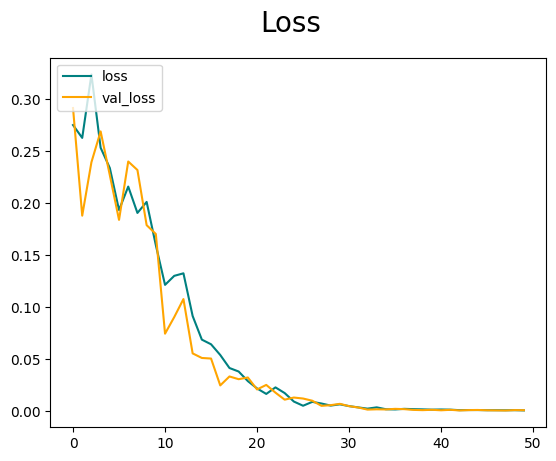

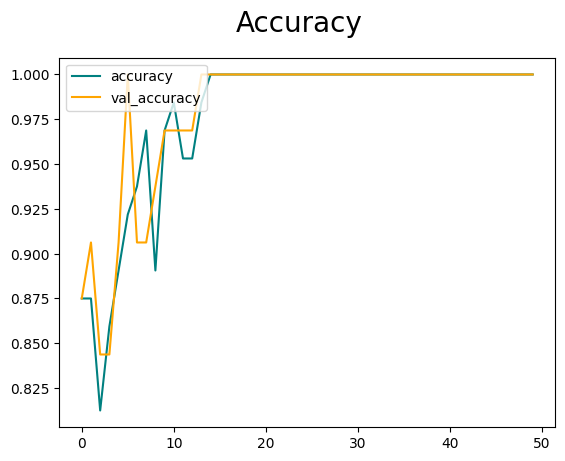

In [103]:

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [24]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print(pre.result(), re.result(), acc.result())


tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


In [ ]:
if yhat > 0.5: 
    os.save(f'Predicted class is Sad')
else:
    os.save(f'Predicted class is Happy')


In [ ]:
###PIPELINE 101 
###ACCESSING IMAGES 
from PIL import Image
import os

# Function to load an image from a file
def load_image(image_path):
    try:
        img = Image.open(image_path)
        img.show()  # This will open the image using the default image viewer
        return img
    except Exception as e:
        print(f"Error loading image: {e}")
        return None
    
    ###IMPLEMENTING MODEL HERE 
    image = cv2.imread(img)

    resize = tf.image.resize(img, (256,256))

    yhat = model.predict(np.expand_dims(resize/255, 0))


    ###PIPELINE 01 PART 2
    ###DIRECTING INTO FILES FOR GAN TO PERFORM 
    import shutil
    import os

    def add_image_to_folder(source_image_path, target_folder_path):
        try:
            # Ensure the target folder exists
            if not os.path.exists(target_folder_path):
                os.makedirs(target_folder_path)

            # Copy the image to the target folder
            shutil.copy(source_image_path, target_folder_path)
            print(f"Image '{source_image_path}' successfully copied to '{target_folder_path}'")

        except Exception as e:
            print(f"Error adding image to folder: {e}")

    # Example usage
    source_image_path = 'path_to_your_image.jpg'  # Path to the source image
    target_folder_path = 'path_to_your_target_folder'  # Path to the target folder

    add_image_to_folder(source_image_path, target_folder_path)
# Example usage
image_path = 'path_to_your_image.jpg'
image = load_image(image_path)

In [ ]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','imageclassifier.h5'))
new_model = load_model('imageclassifier.h5')
new_model.predict(np.expand_dims(resize/255, 0))